In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split  
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc

In [ ]:
url = 'https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv'
df = pd.read_csv(url)

## **Summary of Statistic**

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
miss_data = df.isna().sum().sum()
print('there is {} data missing from the data set'.format(miss_data))

there is 0 data missing from the data set


In [ ]:

print('the table below shows the number of unique data in each feature')
print('------------------------------------------------------------------')
df.nunique()

the table below shows the number of unique data in each feature
------------------------------------------------------------------


crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

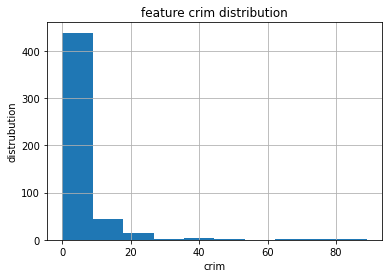

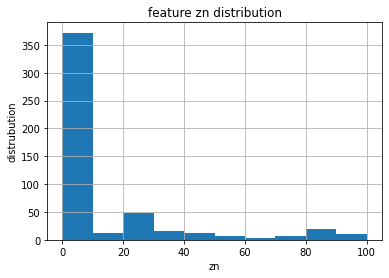

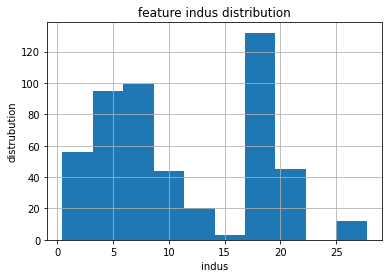

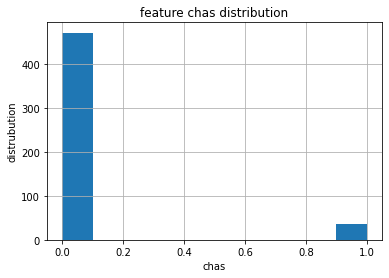

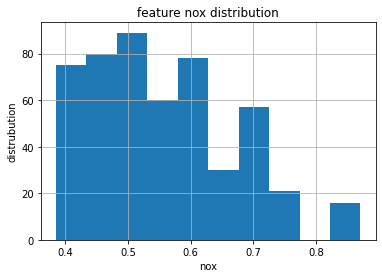

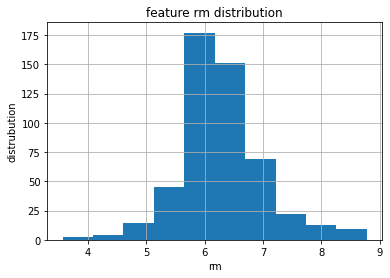

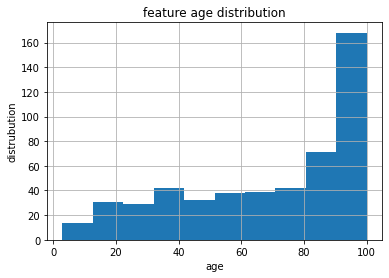

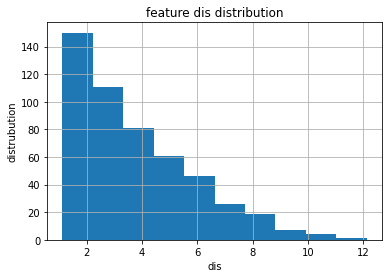

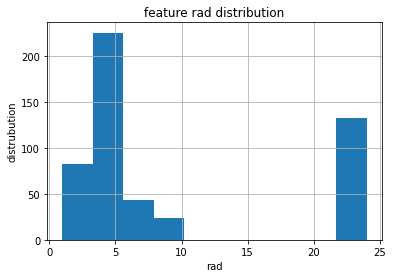

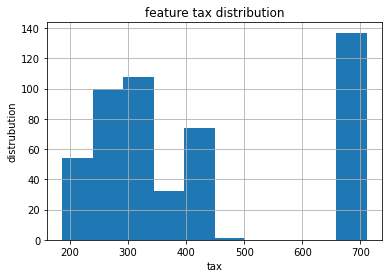

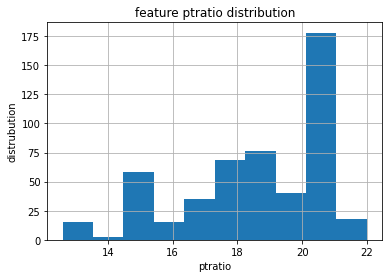

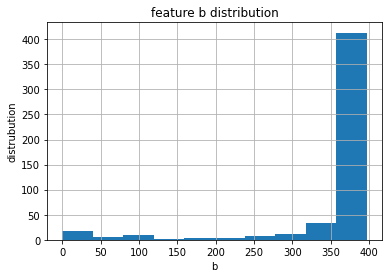

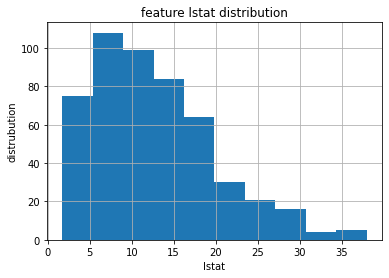

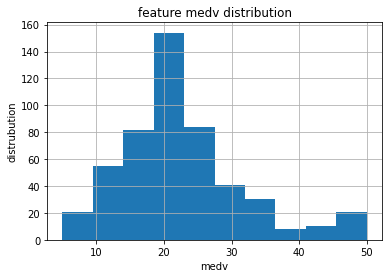

In [ ]:
for i in df:
  df[i].hist()
  plt.title('feature {} distribution'.format(i))
  plt.xlabel(i)
  plt.ylabel('distrubution')
  plt.show()

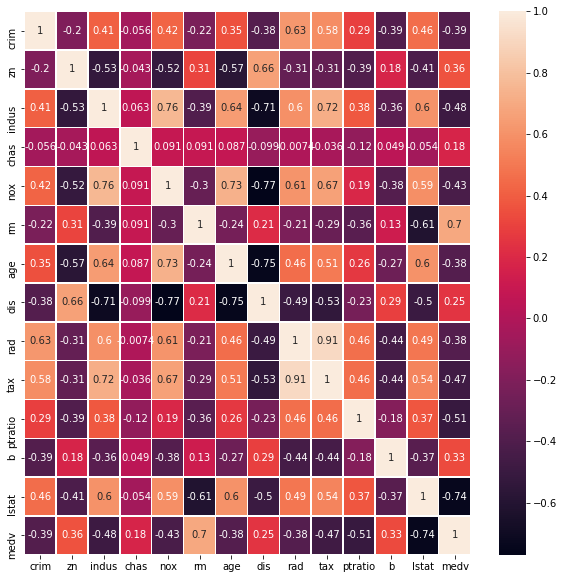

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))        
corr_map = sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

*From the heatmap, we can observe that the rm and lstat are the two most correlated features to the medv( i.e. the average number of dwelling room is most correlated [ 0.7 out of 1 ] to the price).*

The relationship between the new vairable and price is shown below:
------------------------------------------------------------------------


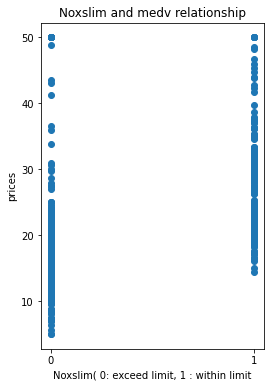

In [ ]:
Noxslim = []
for i in df['nox']:
  if i <= 0.53:
    Noxslim.append(1)
  else:
    Noxslim.append(0)
df['Noxslim'] = Noxslim
plt.figure(figsize=(4, 6))
x_ticks = np.arange(0, 2, 1)
plt.xticks(x_ticks)
plt.plot(df['Noxslim'], df['medv'], 'o')
plt.title('Noxslim and medv relationship')
plt.xlabel('Noxslim( 0: exceed limit, 1 : within limit')
plt.ylabel('prices')
print('The relationship between the new vairable and price is shown below:')
print('------------------------------------------------------------------------')

The new featuren I added is the Nox limitation. **0** represents the Nox concentraion exceeds the limitation 0.53 per million. **1** represents valid concentration. Based on *the* plot I can conclude that the houses located within the valid Nox concentration area has a higher avg price than others. 

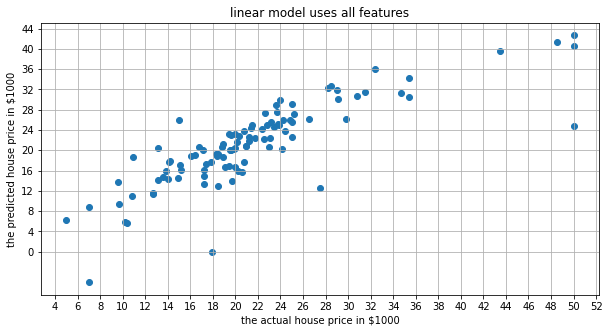

-------------------------------------------------------
 the R-Score of the linear model on train_set is 0.75


 the R-Score of the linear model on test_set is 0.67


In [ ]:
x = df.drop('medv', axis = 1)
x = x.drop('Noxslim', axis = 1)
y = df['medv']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

plt.figure(figsize=(10, 5))
x_ticks = np.arange(0, 60, 2)
plt.xticks(x_ticks)

y_ticks = np.arange(0, 60, 4)
plt.yticks(y_ticks)

plt.scatter(y_test, y_pred)
plt.grid()

              
plt.title('linear model uses all features')
plt.xlabel('the actual house price in $1000')
plt.ylabel('the predicted house price in $1000')
plt.show()
r1_score = round(linear_model.score(x_train, y_train),2)
r2_score = round(linear_model.score(x_test, y_test),2)
print('-------------------------------------------------------')
print(' the R-Score of the linear model on train_set is {}'.format(r1_score))
print('\n')
print(' the R-Score of the linear model on test_set is {}'.format(r2_score))